<a href="https://colab.research.google.com/github/hackveda-canada/Data-Science-Essentials/blob/master/Data_Science_Essentials_Day_5_NLP_%26_Text_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NLP (Natural Language Processing) or Text Mining**
-------------------------------------------------------------

1. Data Assemble
2. Data Pre-Preprocessing
3. Data Exploration
4. Build Model

**Data Assemble: **
---------------------

Direct Communication, Inferred Behaviour, Social communication, --> Corpus --> Pre-Process --> Word Cloud

Library/Package :  textract



In [0]:
#Data Assemble
#Read the data from multiple sources
#a. PDF Documents
#b. Scanned Document/Camtasia Recorder (Whatsapp)
#c. Audio Files


In [0]:
# Setup for Extraction of unstructured text data
# Update my Google Colab and Install Textract Library
!apt-get update

In [0]:
#Setup Textract Library on Google Colab
import textract
#ModuleNotFoundError: No module named 'textract' because Google doesn't provide dependent 
#linux library for textract.
# we will be pip or easy install to install extract

In [3]:
# check the type of OS /Linux
!uname -a

Linux 94a296f56a54 4.14.79+ #1 SMP Wed Dec 19 21:19:13 PST 2018 x86_64 x86_64 x86_64 GNU/Linux


In [4]:
#Setup Textract for extracting text from different sources
!apt-get install python-dev libxml2-dev libxslt1-dev antiword unrtf poppler-utils \
 pstotext tesseract-ocr \
 flac ffmpeg lame libmad0 libsox-fmt-mp3 sox libjpeg-dev swig libasound2-dev libpulse-dev

!pip install git+https://github.com/deanmalmgren/textract
  
#Restart to bring-in effect Textract - You must restart the runtime in order to use newly installed versions.

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libjpeg-dev is already the newest version (8c-2ubuntu8).
libjpeg-dev set to manually installed.
python-dev is already the newest version (2.7.15~rc1-1).
libasound2-dev is already the newest version (1.1.3-5ubuntu0.2).
libxml2-dev is already the newest version (2.9.4+dfsg1-6.1ubuntu1.2).
ffmpeg is already the newest version (7:3.4.4-0ubuntu0.18.04.1).
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gsfonts libcupsfilters1
  libcupsimage2 libgs9 libgs9-common libid3tag0 libijs-0.35 libjbig2dec0
  libmagic-mgc libmagic1 libopencore-amrnb0 libopencore-amrwb0
  libpulse-mainloop-glib0 libsox-fmt-alsa libsox-fmt-base libsox3 poppler-data
  swig3.0 tesseract-ocr-eng tesseract-ocr-osd
Suggested packages:
  fonts-noto ghostscript-x lame-doc file libsox-fmt-all fonts-japanese-mincho
  | fonts-ipafont-mincho fonts-japanese-gothic | fonts-ipafont-g

In [3]:
#Now import the textract
import textract

#Demo 1: Extract text from PDF Files
# Step 1: Download the file on Google Colab
!wget https://newsroom.intel.com/wp-content/uploads/sites/11/2018/03/smart-cities-whats-in-it-for-citizens.pdf 

#file we would get "smart-cities-whats-in-it-for-citizens.pdf"

--2019-02-13 13:42:00--  https://newsroom.intel.com/wp-content/uploads/sites/11/2018/03/smart-cities-whats-in-it-for-citizens.pdf
Resolving newsroom.intel.com (newsroom.intel.com)... 23.46.202.254
Connecting to newsroom.intel.com (newsroom.intel.com)|23.46.202.254|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 962023 (939K) [application/pdf]
Saving to: ‘smart-cities-whats-in-it-for-citizens.pdf.1’

smart-cities-whats- 100%[===================>] 939.48K  --.-KB/s    in 0.07s   

2019-02-13 13:42:00 (13.8 MB/s) - ‘smart-cities-whats-in-it-for-citizens.pdf.1’ saved [962023/962023]



In [7]:
# Step 2 - Read the content from the PDF file
text = textract.process("smart-cities-whats-in-it-for-citizens.pdf")
text = str(text)
print("Type of text", type(text))
print("Show content from pdf \n", text)


Type of text <class 'str'>
Show content from pdf 
 b"SMART CITIES \xe2\x80\x93 WHAT\xe2\x80\x99S IN\nIT FOR CITIZENS?\n\nwww.juniperresearch.com\n\n\x0cSMART CITIES \xe2\x80\x93 WHAT\xe2\x80\x99S IN IT FOR CITIZENS?\n\nContents\nStudy Background .................................................................................2\nSmart Cities will Deliver 15 Working Days ..........................................3\nWhy do We Need Smart Cities?............................................................4\nHow do These Factors Affect Me Today?............................................5\nGlobal City Performance 2017 ..............................................................6\nMobility ...................................................................................................7\nCase Study: San Francisco...................................................................7\nHealthcare...............................................................................................7\n

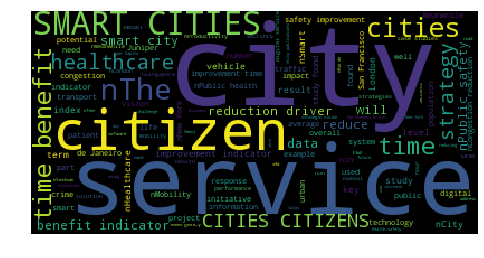

In [20]:
#Remove some special characters out
import re
text = re.sub("xe2","",text)
text = re.sub("x80","",text)
text = re.sub("x99","",text)
text = re.sub("x0c","",text)
text = re.sub("x93","",text)
text = re.sub("nCase Study","",text)



#Explore the pdf content using the wordcloud
from wordcloud import WordCloud
wc = WordCloud().generate(text)


import matplotlib.pyplot as plt
plt.imshow(wc)
plt.axis("off")
  #plt.title(url)
  #print(url)
plt.show()
 

In [0]:
# Demo 2: Extract the content from Scanned Document